In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/stackoverflow_full.csv')

In [ ]:
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [ ]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [ ]:
df.shape

(73462, 14)

In [ ]:
df['EdLevel'].unique()

array(['Master', 'Undergraduate', 'PhD', 'Other', 'NoHigherEd'],
      dtype=object)

In [ ]:
df.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [ ]:
df = df.fillna(method='ffill')

In [ ]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## Exploratory Data Analysis

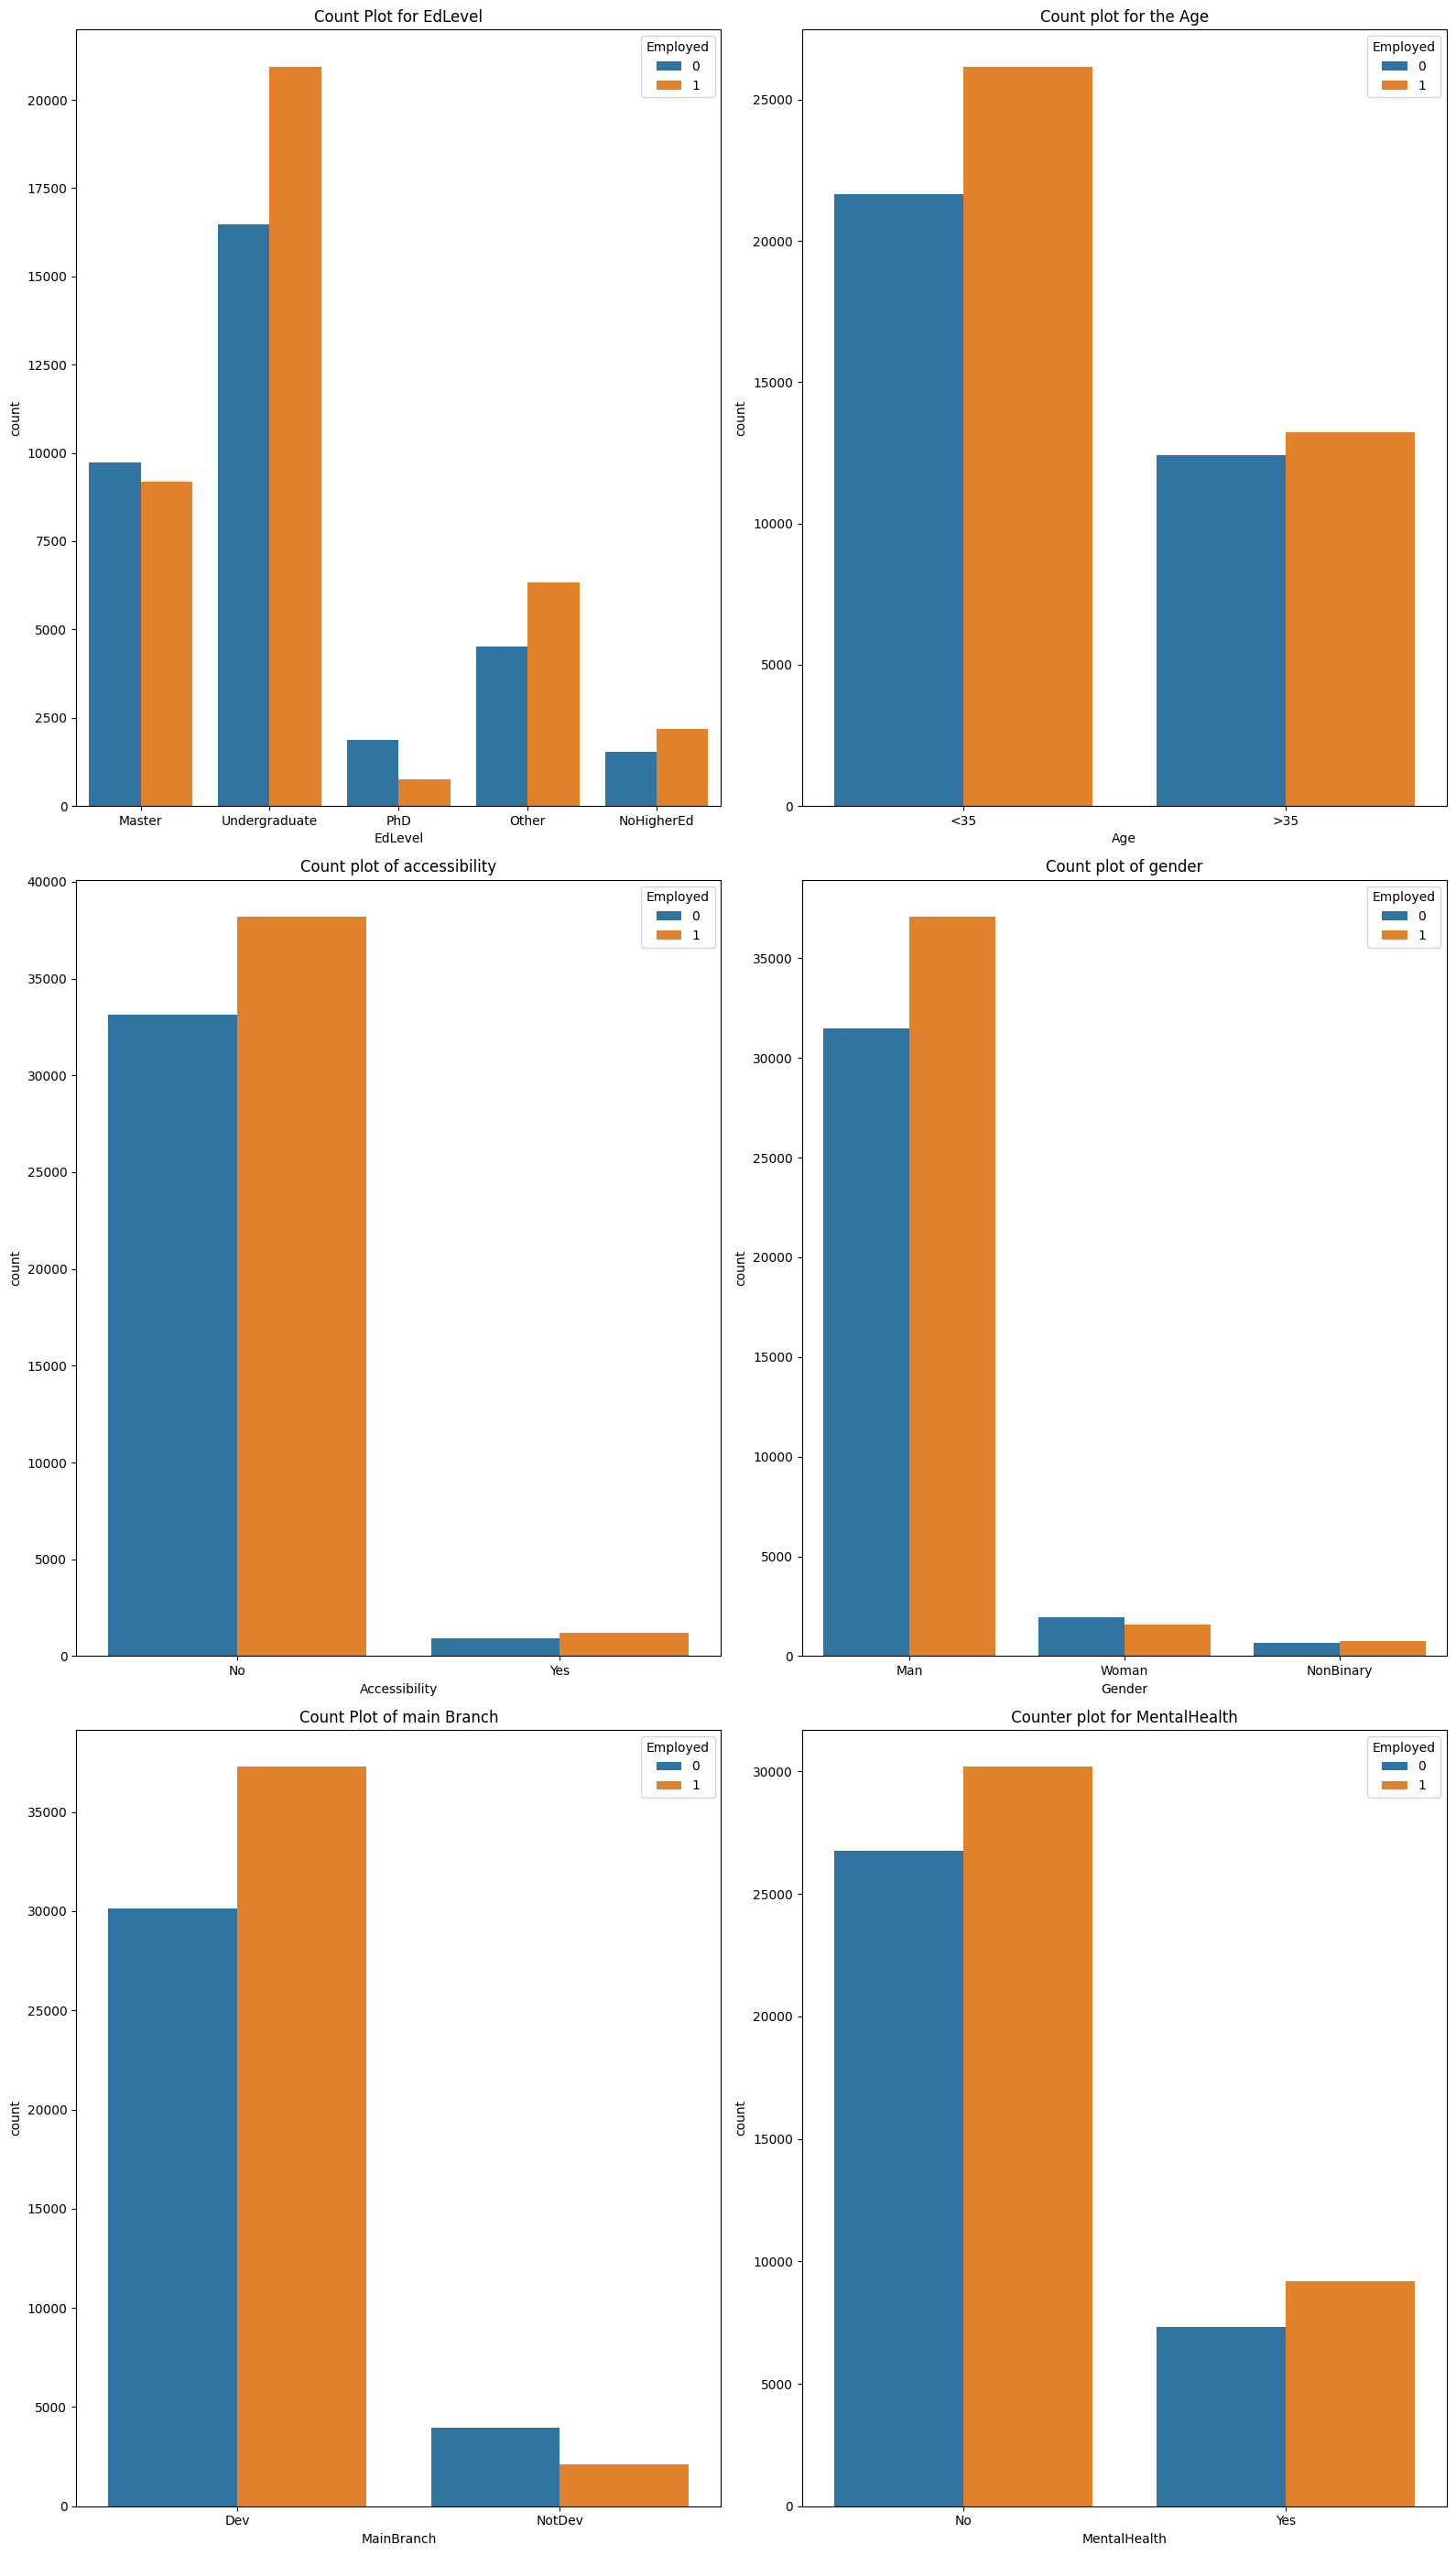

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize=(16,28))
sns.countplot(x = 'EdLevel', hue ='Employed', data=df ,ax=axes[0,0] )
axes[0,0].set_title('Count Plot for EdLevel')
sns.countplot(x = 'Age', hue='Employed', data = df, ax = axes[0,1])
axes[0,1].set_title('Count plot for the Age')
sns.countplot(x ='Accessibility',hue = 'Employed', data= df, ax= axes[1,0])
axes[1,0].set_title('Count plot of accessibility')
sns.countplot( x = 'Gender', hue = 'Employed', data = df , ax = axes[1,1])
axes[1,1].set_title('Count plot of gender')
sns.countplot(x = 'MainBranch', hue = 'Employed', data = df , ax= axes[2,0])
axes[2,0].set_title('Count Plot of main Branch')
sns.countplot(x = 'MentalHealth', hue = 'Employed', data = df, ax = axes[2,1])
axes[2,1].set_title(' Counter plot for MentalHealth ')
plt.tight_layout()
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


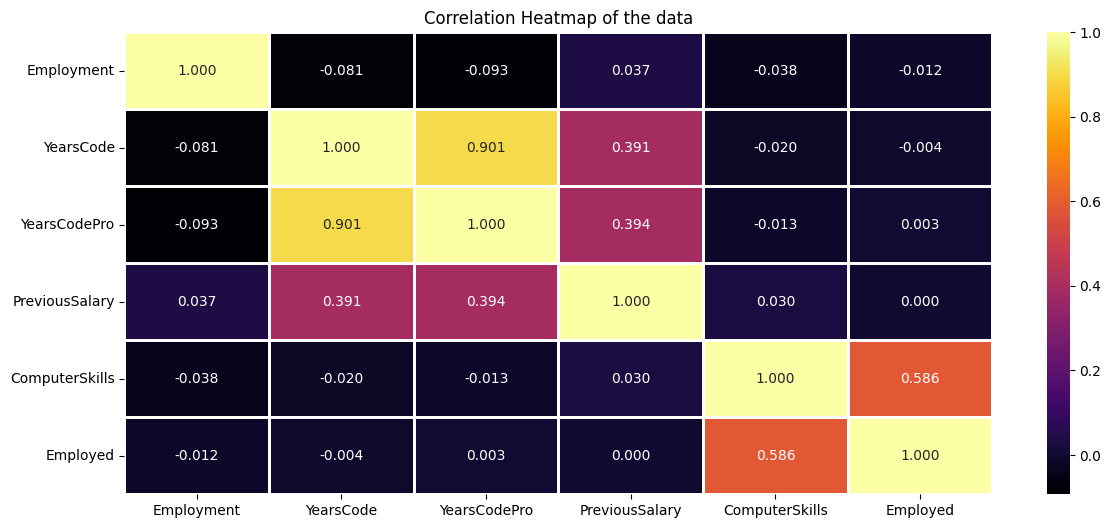

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, fmt='.3f', linewidth=1)
plt.title('Correlation Heatmap of the data')
plt.show()


In [ ]:
column_list = ['EdLevel','MentalHealth','Gender','MainBranch','Country','Age','Accessibility','HaveWorkedWith']

In [ ]:
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score,roc_curve, auc
#from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



In [ ]:
label_encoder = LabelEncoder()
for column in column_list:
    if column in df.columns and df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

## Standard Scale Selection in large values

In [ ]:
scaler = StandardScaler()
df[['PreviousSalary','HaveWorkedWith']] = scaler.fit_transform(df[['PreviousSalary','HaveWorkedWith']])

In [ ]:
X = df.drop(columns=['Employed'], axis=1)
y = df['Employed']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('ytest', y_test.shape)

x_train (58769, 13)
y_train (58769,)
x_test (14693, 13)
ytest (14693,)


# Decision Tree classifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6826
           1       0.80      0.80      0.80      7867

    accuracy                           0.79     14693
   macro avg       0.79      0.79      0.79     14693
weighted avg       0.79      0.79      0.79     14693



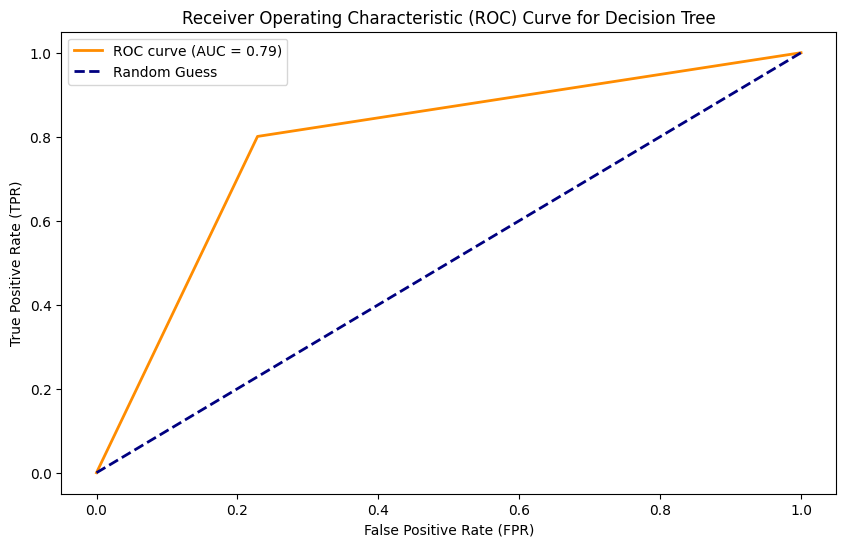

In [ ]:
y_scores = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend()
plt.show()

# Accuracy Without HyperParameter Tuning and feature engineering

In [ ]:
print('accuracy',accuracy)

accuracy 0.7871095079289457


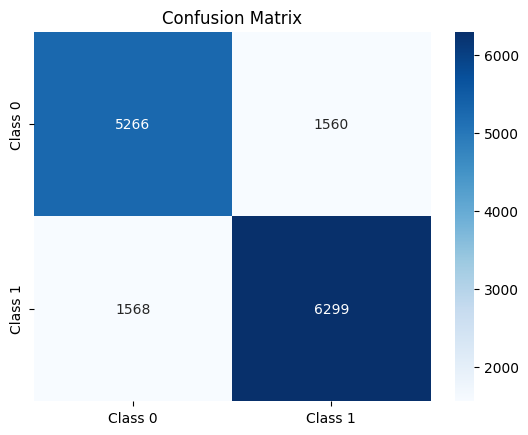

In [ ]:
# Plot the confusion matrix using matplotlib and seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()


# Features Importance in predictions in Decision tree

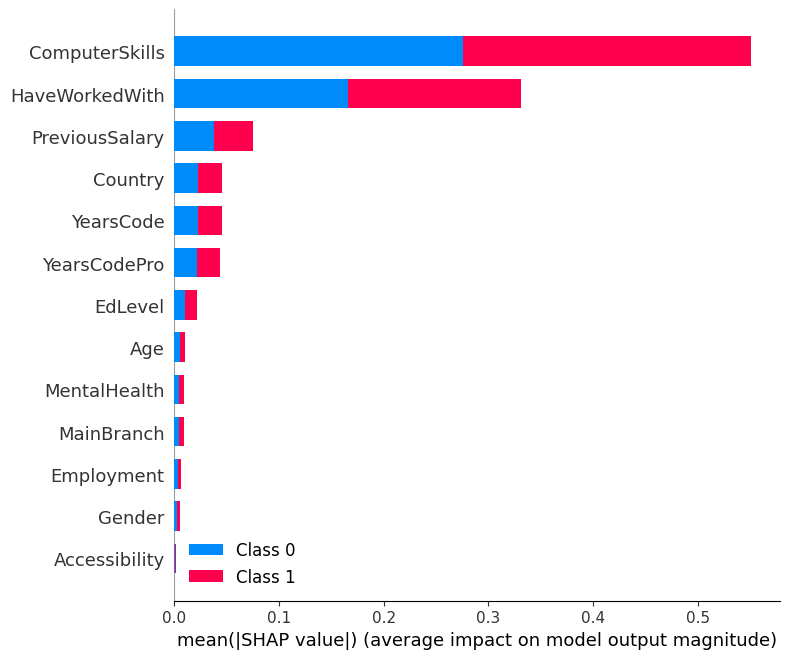

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

## Implementation of GridSearchCV

In [ ]:
param_grid = {
    'max_depth' :    [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state' : [0,42]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
bestparame = grid_search.best_params_
print('Best parameter', bestparame)

Best parameter {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
dtree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3,min_samples_split=2,random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=42)

In [ ]:

y_pred = dtree.predict(x_test)
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.8214115565235146


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.8364
Recall: 0.8285
F1-score: 0.8324


## Gradient Boosting Algorithm for improving the accuracy of algorithm

In [ ]:
gb_classifier = GradientBoostingClassifier(**bestparame)
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)



Accuracy on Test Set: 0.8523106241067174


In [ ]:
confu_matrix = confusion_matrix(y_test, y_pred)

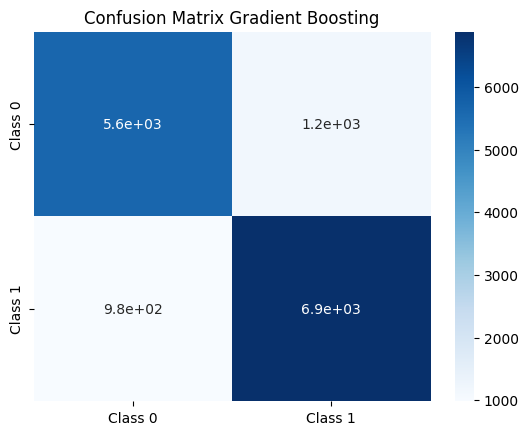

In [ ]:
sns.heatmap(confu_matrix, annot = True, cmap = 'Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1']  )
plt.title('Confusion Matrix Gradient Boosting')
plt.show()

## Random Forest Classifier for improving accuracy

In [ ]:
r_classifier = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)
r_classifier.fit(x_train, y_train)

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)

In [ ]:
predictions = r_classifier.predict(x_test)

In [ ]:
acc_score = accuracy_score(y_test, predictions)
print('accuracy', acc_score)

accuracy 0.8070509766555503


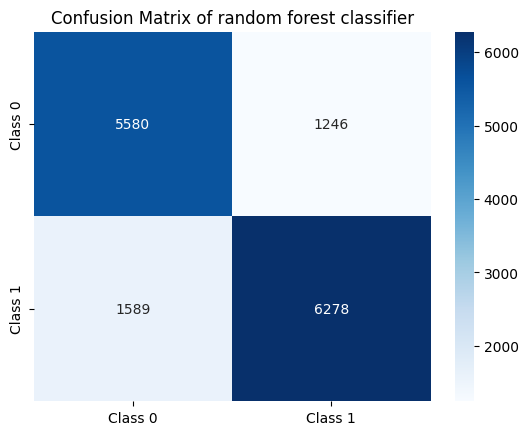

In [ ]:
# Plot the confusion matrix using matplotlib and seaborn
confusion_matrix_random = confusion_matrix(y_test,predictions)
sns.heatmap(confusion_matrix_random, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix of random forest classifier')
plt.show()


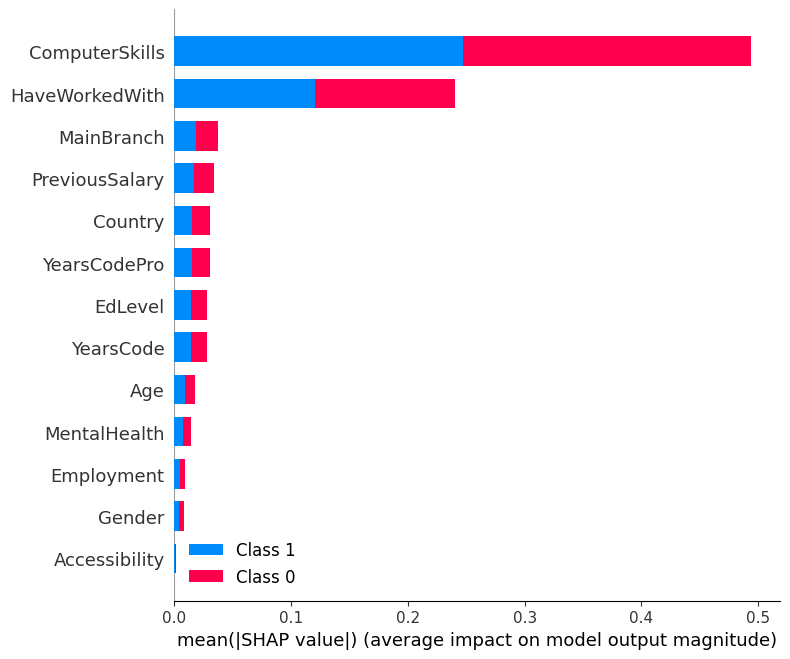

In [ ]:
explainer = shap.TreeExplainer(r_classifier)
shap_values = explainer.shap_values(shap.sample(x_test))  # Adjust the number as needed
shap.summary_plot(shap_values, x_test)

# Hyper Parameter tuning of Random Classifier Using RandomSearchCV

In [ ]:
param_grid = {
    'n_estimators' : [10, 30, 90],
    'criterion' :      ['gini','entropy'],
    'min_samples_split' : [2,4,8],
    'min_samples_leaf' : [1,2,3],
    'max_depth'       :  [1,2,3,4,5,8],
    'max_features'    :  ['auto','sqrt','log2'],
    'bootstrap'        :  [True,False]
}
random_search = RandomizedSearchCV(r_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring = 'accuracy')
random_search.fit(x_train, y_train)
bestParam = random_search.best_params_
print('Best Parameters:', bestParam)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

Best Parameters: {'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}


## Accuracy After the Hyper Parameter Tuning

In [ ]:
r_classifier = RandomForestClassifier(n_estimators=90, oob_score=True,min_samples_split = 8,min_samples_leaf=1,max_features='log2', max_depth = 8,criterion = 'gini',bootstrap = True, random_state=42)
r_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_split=8,
                       n_estimators=90, oob_score=True, random_state=42)

In [ ]:
y_pred = r_classifier.predict(x_test)
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.8138569386782821


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.8089
Recall: 0.8542
F1-score: 0.8309


## SVM  Model Application

In [ ]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
predict_svm = model.predict(x_test)
print('Accuracy :',accuracy_score(y_test, predict_svm))

Accuracy : 0.6585448853195399


## Naive Bayes Algorithm

In [ ]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
predict_NB = NB_model.predict(x_test)
print('Accuracy :', accuracy_score(y_test,predict_NB))

Accuracy : 0.7764241475532566


# Logistic Regression

In [ ]:
Logistic_model = LogisticRegression()

Logistic_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logistic_predict = Logistic_model.predict(x_test)
print('Accuracy :',accuracy_score(y_test, logistic_predict))

Accuracy : 0.7756074321105288


## Hyper Parameter Tuning

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}
Gsearch = GridSearchCV(Logistic_model, param_grid, cv = 5 )
Gsearch